# Imports

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

# Funciones a utliizar

In [16]:
#Parametros pedidos por el problema
r, K, x0, T = 0.1, 1000, 10, 100
# x(t) real para comparar y medir errores  
exacta = lambda t: K / (1 + (K/x0 - 1) * np.exp(-r*t))

In [17]:
# Modelo
f = lambda x: r * x * (1 - x/K)

In [ ]:
#Integradores (dados por KIMI 2)
def euler(f, x0, dt, T):
    N = int(T/dt)
    x = np.empty(N+1); x[0]=x0
    for n in range(N):
        x[n+1] = x[n] + dt*f(x[n])
    return x

def rk4(f, x0, dt, T):
    N = int(T/dt)
    x = np.empty(N+1); x[0]=x0
    for n in range(N):
        k1 = dt*f(x[n])
        k2 = dt*f(x[n]+k1/2)
        k3 = dt*f(x[n]+k2/2)
        k4 = dt*f(x[n]+k3)
        x[n+1] = x[n] + (k1+2*k2+2*k3+k4)/6
    return x

### Encontramos el error relativo en t=50 con Δt=1

In [21]:
dt = 1.0
t50_index = int(50/dt)
x_eul = euler(f, x0, dt, T)
x_rk  = rk4(f, x0, dt, T)
err_eul = abs(x_eul[t50_index] - exacta(50)) / exacta(50)
err_rk  = abs(x_rk[t50_index] - exacta(50)) / exacta(50)
print(f"Error relativo en t=50, Δt=1:")
print(f"  Euler: {err_eul:.4%}")
print(f"  RK4  : {err_rk:.4%}")

Error relativo en t=50, Δt=1:
  Euler: 6.4703%
  RK4  : 0.0001%


Aqui podemos ver como es que RK4 es el indicado para pruebas donde se necesite un error MINIMO, demasiado rotundo el modelo de RK4 en precision

### Threshold dt donde error global < 1 %

In [ ]:
dts = np.logspace(-2, 0.8, 40)         
errors_eul, errors_rk = [], []
for dt in dts:
    N = int(T/dt)
    x_e = euler(f, x0, dt, T)
    x_r = rk4(f, x0, dt, T)
    errors_eul.append(np.max(np.abs(x_e - exacta(np.linspace(0,T,N+1))) / exacta(np.linspace(0,T,N+1))))
    errors_rk.append(np.max(np.abs(x_r - exacta(np.linspace(0,T,N+1))) / exacta(np.linspace(0,T,N+1))))

### Encontramos el  dt crítico

In [24]:
dt_th_eul = dts[np.where(np.array(errors_eul)<0.01)[0][0]]
dt_th_rk  = dts[np.where(np.array(errors_rk)<0.01)[0][0]]
print(f"\nThreshold dt para error < 1 %:")
print(f"  Euler: Δt ≤ {dt_th_eul:.3f}")
print(f"  RK4  : Δt ≤ {dt_th_rk:.3f}")


Threshold dt para error < 1 %:
  Euler: Δt ≤ 0.010
  RK4  : Δt ≤ 0.010


### Estabilidad con Δt grande (>5)

In [25]:
dt_large = 5.5
x_large_eul = euler(f, x0, dt_large, T)
x_large_rk  = rk4(f, x0, dt_large, T)
print(f"\nEstabilidad Δt = {dt_large}:")
print(f"  Euler diverge o oscila: {np.any(x_large_eul < 0)}")
print(f"  RK4  sigue positivo   : {np.all(x_large_rk >= 0)}")


Estabilidad Δt = 5.5:
  Euler diverge o oscila: False
  RK4  sigue positivo   : True


### Grafica de error vs dt

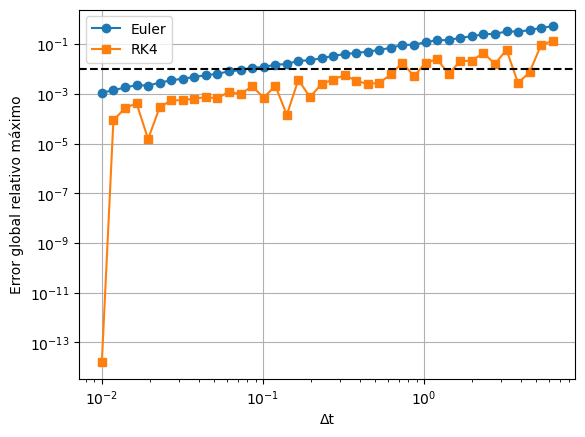

In [26]:
plt.loglog(dts, errors_eul, 'o-', label='Euler')
plt.loglog(dts, errors_rk, 's-', label='RK4')
plt.axhline(0.01, color='k', ls='--')
plt.xlabel('Δt'); plt.ylabel('Error global relativo máximo')
plt.legend(); plt.grid(True); plt.show()

- ¿Qué método mantiene mejor la estabilidad?
-   El Kr4 puede soportar cambios abruptos de mejor manera 
- ¿Cómo escala el error con Δt en cada método?
-   En los dos escala de manera lineal más en el metodo de KR4 si que tiene un crecimiento exponencial en el principio del Δt
- ¿Cuándo convendría elegir Euler en lugar de RK4?  
-   Con lo visto en la prueba podríamos decir que en RK4 puede ser muy util en pruebas de fs "grandes" y donde no priorizamos la maxima presición, o también donde nuestro hardware a utilizar sea pobre en potencia
